In [1]:
import warnings
warnings.filterwarnings('ignore')

import numpy as np
import scipy as sp
import os, sys,glob, copy
import pandas as pd

import matplotlib.pyplot as plt
plt.style.use('default')
%matplotlib inline
import seaborn as sns


# for each unit, mean across total connectivity to the network

306046
218
388523
164
389262
119
408153
174
410344
171
415149
200
412809
185
412804
131
416856
161
419114
240
419117
156
419118
171
419119
180
424445
180
415148
185
416356
165
416861
243
419112
204
419116
240


<Figure size 432x288 with 0 Axes>

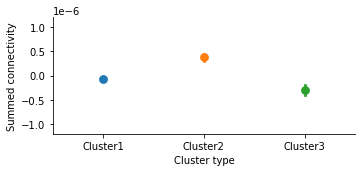

<Figure size 432x288 with 0 Axes>

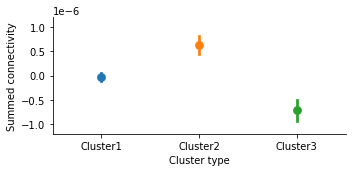

<Figure size 432x288 with 0 Axes>

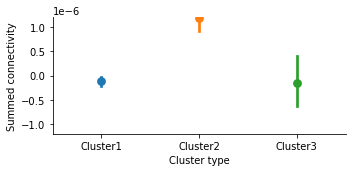

<Figure size 432x288 with 0 Axes>

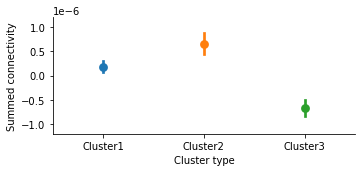

<Figure size 432x288 with 0 Axes>

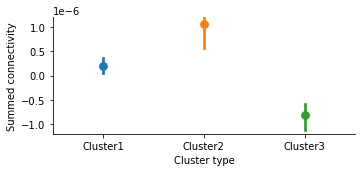

<Figure size 432x288 with 0 Axes>

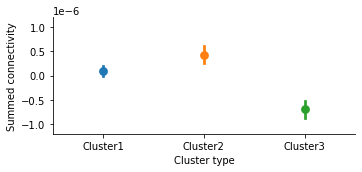

<Figure size 432x288 with 0 Axes>

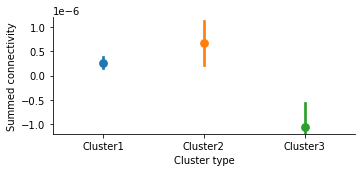

<Figure size 432x288 with 0 Axes>

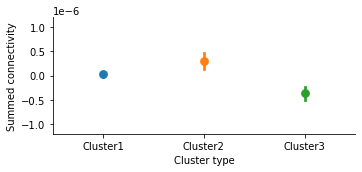

<Figure size 432x288 with 0 Axes>

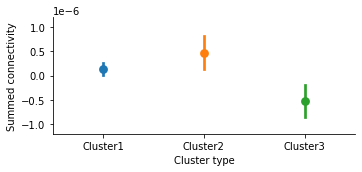

<Figure size 432x288 with 0 Axes>

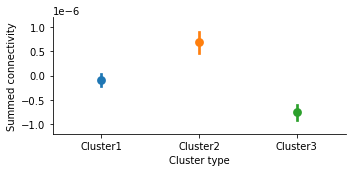

<Figure size 432x288 with 0 Axes>

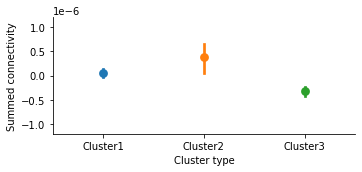

<Figure size 432x288 with 0 Axes>

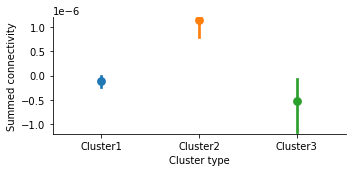

<Figure size 432x288 with 0 Axes>

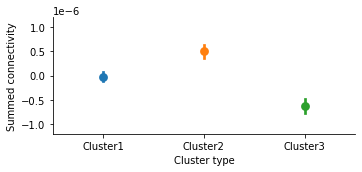

<Figure size 432x288 with 0 Axes>

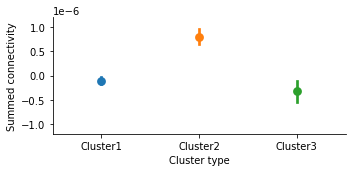

<Figure size 432x288 with 0 Axes>

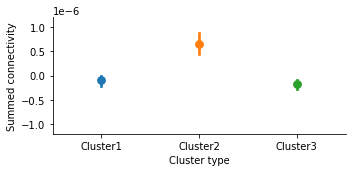

<Figure size 432x288 with 0 Axes>

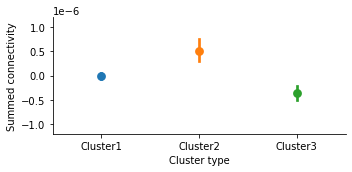

<Figure size 432x288 with 0 Axes>

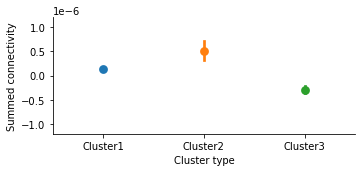

<Figure size 432x288 with 0 Axes>

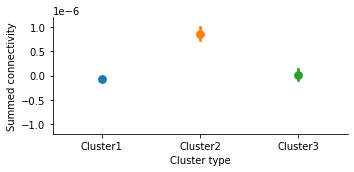

<Figure size 432x288 with 0 Axes>

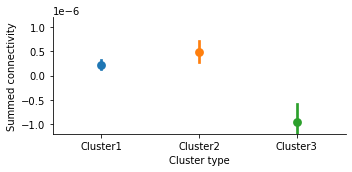

In [4]:
verbose = True

# grating and spon
mouse_IDs = ['306046','388523', '389262',  '408153','410344', '415149', '412809', '412804',
             '416856', '419114',  '419117', '419118', '419119', '424445',
             '415148', '416356','416861','419112','419116']

P_total=[]
DF_drive=[] # drive to the network from each cluster
DF=[] # meta data
total_sum=[]
N = np.zeros((len(mouse_IDs),3))
C = np.zeros((len(mouse_IDs),3))
C_std = np.zeros((len(mouse_IDs),3))
for idx, mouse_ID in enumerate(mouse_IDs):
    print(mouse_ID)
    # 1. load df
    X = np.load('~/data/CM/mouse'+mouse_ID+'_adjacency_matrix_RF.npy')
    # spontaneous
    #X = np.load('/Users/xiaoxuanj/work/work_allen/Ephys/processed_data/adjacency_matrix/RF_onscreen/mouse'+mouse_ID+'_adjacency_matrix_RF_spon.npy')
        
    df = pd.read_csv('~/data/CM/mouse'+mouse_ID+'_meta_cluster_RF.csv')
    DF.append(df)
    print(len(df))
    N[idx, 0] = len(df[df.cluster==1])/len(df)
    N[idx, 1] = len(df[df.cluster==2])/len(df)
    N[idx, 2] = len(df[df.cluster==3])/len(df)
    
    C[idx, 0] = np.nanmean(np.nanmean(X[np.where(df.cluster==1)[0], :], axis=1))
    C[idx, 1] = np.nanmean(np.nanmean(X[np.where(df.cluster==2)[0], :], axis=1))
    C[idx, 2] = np.nanmean(np.nanmean(X[np.where(df.cluster==3)[0], :], axis=1))
    
    # standard error across all target units
    C_std[idx, 0] = np.nanstd(np.nanmean(X[np.where(df.cluster==1)[0], :], axis=1))/np.sqrt(len(df))
    C_std[idx, 1] = np.nanstd(np.nanmean(X[np.where(df.cluster==2)[0], :], axis=1))/np.sqrt(len(df))
    C_std[idx, 2] = np.nanstd(np.nanmean(X[np.where(df.cluster==3)[0], :], axis=1))/np.sqrt(len(df))
    
    df_tmp = pd.DataFrame()
    # mean activity, across target for each unit in each cluster
    df_tmp['Summed connectivity']=np.concatenate([np.nanmean(X[np.where(df.cluster==1)[0], :], axis=1),
                                                 np.nanmean(X[np.where(df.cluster==2)[0], :], axis=1),
                                                 np.nanmean(X[np.where(df.cluster==3)[0], :], axis=1)], axis=0)
    df_tmp['Cluster type']=np.concatenate([len(np.where(df.cluster==1)[0])*['Cluster1'],
                                            len(np.where(df.cluster==2)[0])*['Cluster2'],
                                           len(np.where(df.cluster==3)[0])*['Cluster3']], axis=0)

    total_sum.append([np.nansum(X[np.where(df.cluster==1)[0], :].flatten()),
                     np.nansum(X[np.where(df.cluster==2)[0], :].flatten()),
                     np.nansum(X[np.where(df.cluster==3)[0], :].flatten())])
    plt.figure()
    sns.factorplot('Cluster type','Summed connectivity',data=df_tmp,
                    size=2.5,
                    #col='area',
                    hue='Cluster type',
                    #kind="violin",
                    aspect=2, 
                    fontsize=10
                  )
    plt.ylim([-1.2E-6, 1.2E-6])
    DF_drive.append(df_tmp)
    
total_sum = np.array(total_sum)

In [5]:
DF=pd.concat(DF, axis=0)
DF = DF.reset_index().drop(['index'], axis=1)

DF_drive=pd.concat(DF_drive, axis=0)
DF_drive = DF_drive.reset_index().drop(['index'], axis=1)


In [6]:
len(np.where(DF_drive['Cluster type'].values=='Cluster1')[0])

1386

(0.0, 0.6)

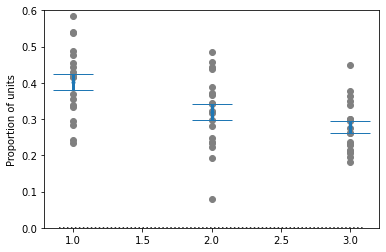

In [5]:
for i in range(19):
    plt.scatter([1,2,3],N[i,:], c='gray')
plt.errorbar([1,2,3],np.nanmean(N, axis=0), np.nanstd(N, axis=0)/np.sqrt(19),fmt='.',elinewidth=3,capsize=20)
plt.plot([0.9,3.1],[0,0], ':k')
plt.ylabel('Proportion of units')
plt.ylim([0,0.6])
#plt.savefig('/Users/xiaoxuanj/Dropbox/2019 information_flow_paper/Neuron submission/second_submission/cluster_proportion_mouse.pdf')

In [6]:
# Bonferoni corrected pairwise comparison
from scipy.stats import ttest_rel
[t, p] = ttest_rel(N[:,1],N[:,2])
p_value = p/3
print(p_value)


0.07656389186279776


(-1.3e-06, 1.3e-06)

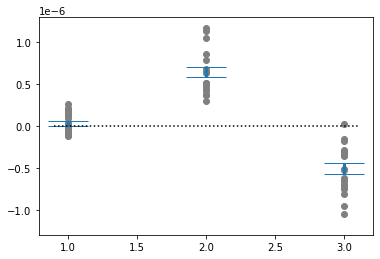

In [7]:
for i in range(19):
    plt.scatter([1,2,3],C[i,:], c='gray')
plt.errorbar([1,2,3],np.nanmean(C, axis=0), np.nanstd(C, axis=0)/np.sqrt(19),fmt='.',elinewidth=3,capsize=20)
plt.plot([0.9,3.1],[0,0], ':k')
plt.ylim([-1.3e-6, 1.3e-6])

#plt.ylim([-1.5e-7, 1.5e-7])
#plt.title('Spontaneous')



In [8]:
from scipy.stats import ttest_1samp
ttest_1samp(C[:,2], 0)

Ttest_1sampResult(statistic=-7.641842282896315, pvalue=4.6759292185926445e-07)

In [9]:
for probe in DF_drive['Cluster type'].unique():
    print(len(DF_drive[DF_drive['Cluster type']==probe]))

1386
1131
970


In [10]:
for probe in DF.probe_id.unique():
    print(len(DF[DF.probe_id==probe]))

533
1129
541
617
346
321


(0.0, 12.0)

<Figure size 432x288 with 0 Axes>

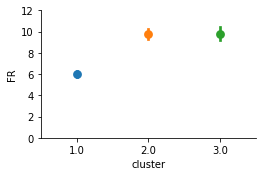

In [11]:
# firing rate in each cluster
# for each unit, mean across total connectivity to the network
# paper figure

plt.figure()

sns.factorplot('cluster','FR',data=DF,
                size=2.5,
                #col='area',
                hue='cluster',
                #kind="violin",
                aspect=1.5, 
                fontsize=10
              )
#plt.plot([-0.1,2.1],[0,0], ':k')
plt.ylim([0, 12])


In [12]:
tmp = DF[DF['cluster']==3]['FR'].values
print(tmp.mean(), tmp.std()/np.sqrt(len(tmp)))

9.774302214585733 0.30633553123521046


In [13]:
from scipy.stats import ttest_ind
ttest_ind(DF[DF['cluster']==3]['FR'].values,DF[DF['cluster']==2]['FR'].values)

Ttest_indResult(statistic=0.0761166199076895, pvalue=0.9393335716324502)

In [14]:
from scipy.stats import ttest_ind
ttest_ind(DF[DF['cluster']==2]['FR'].values, DF[DF['cluster']==1]['FR'].values)

Ttest_indResult(statistic=13.339656615368414, pvalue=2.8468268000280594e-39)

In [15]:
from scipy.stats import ttest_ind
ttest_ind(DF[DF['cluster']==3]['FR'].values, DF[DF['cluster']==1]['FR'].values)

Ttest_indResult(statistic=11.848090216710524, pvalue=1.6964991390651601e-31)

In [16]:
total_sum.shape

(19, 3)

In [17]:
len(mouse_IDs)

19

# plot cluster distrtibution

In [18]:
# subsample to match number of units in each layer or area
np.random.seed(1)
replace = False  # with replacement

df_tmp=DF[DF.cluster!=1]

tmp = df_tmp.depth_range_3layer.unique()
n=[]
for t in tmp:
    n.append(len(df_tmp[df_tmp.depth_range_3layer==t]))
size=min(n)

ratio = size/len(df_tmp)
#random subsample

fn = lambda obj: obj.loc[np.random.choice(obj.index, size, replace),:]
df_subset = df_tmp.groupby('depth_range_3layer', as_index=False).apply(fn)


u = np.unique(DF['depth_range_3layer'].values)
layers = []
for i in range(100):
    np.random.seed(i)
    df_subset = df_tmp.groupby('depth_range_3layer', as_index=False).apply(fn)
    ttmp=[]
    for cluster_id in [2,3]:
        df_ttmp=df_subset[df_subset['cluster']==cluster_id]
        tmp=[]
        for idx_u in u:
            tmp.append(len(df_ttmp[df_ttmp['depth_range_3layer']==idx_u])/float(len(df_ttmp)))
        ttmp.append(tmp)
    layers.append(ttmp)
layers = np.array(layers)

In [19]:
layers.shape

(100, 2, 3)

(0.0, 0.5)

<Figure size 300x300 with 0 Axes>

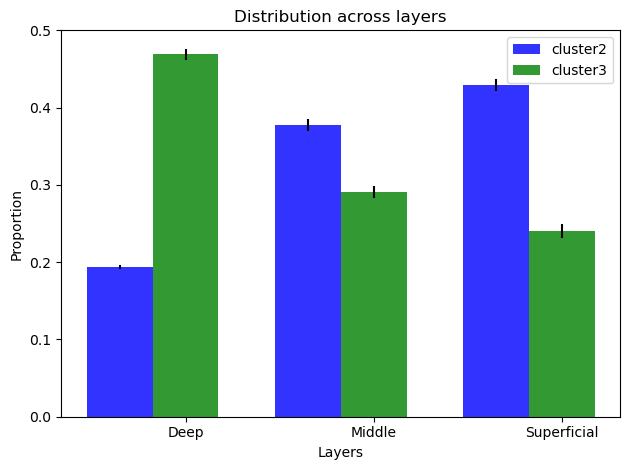

In [21]:
plt.style.use('default')
# data to plot
n_groups = 3
means_frank = layers[:,0,:].mean(0)
means_guido = layers[:,1,:].mean(0)
 
# create plot
plt.figure(figsize=(3,3))
fig, ax = plt.subplots()
index = np.arange(n_groups)
bar_width = 0.35
opacity = 0.8

rects1 = plt.bar(index, means_frank, bar_width,
        alpha=opacity,
        color='b',
        label='cluster2',
        yerr=layers[:,0,:].std(0))

rects2 = plt.bar(index + bar_width, means_guido, bar_width,
alpha=opacity,
color='g',
label='cluster3',
yerr=layers[:,1,:].std(0))

plt.xlabel('Layers')
plt.ylabel('Proportion')
plt.title('Distribution across layers')
plt.xticks(index + bar_width, ('Deep', 'Middle', 'Superficial'))
plt.legend()
 
plt.tight_layout()
plt.ylim([0,0.5])


In [8]:
means_guido

array([0.46889265, 0.29100584, 0.24010151])

In [22]:
# need to match number of each condition
np.random.seed(1)
replace = True  # with replacement
fn = lambda obj: obj.loc[np.random.choice(obj.index, size, replace),:]

df_tmp=DF[DF.cluster!=1]

tmp = df_tmp.area.unique()
n=[]
for t in tmp:
    n.append(len(df_tmp[df_tmp.area==t]))
size=min(n)
ratio = size/len(df_tmp)

u = ['V1',  'RL', 'LM', 'AL',  'PM','AM',]
layers = []
for i in np.arange(100):
    np.random.seed(i)
    df_subset = df_tmp.groupby('area', as_index=False).apply(fn)
    ttmp=[]
    for cluster_id in [2,3]:
        df_ttmp=df_subset[df_subset['cluster']==cluster_id]
        tmp=[]
        for idx_u in u:
            tmp.append(len(df_ttmp[df_ttmp['area']==idx_u])/float(len(df_ttmp)))
        ttmp.append(tmp)
    layers.append(ttmp)
layers = np.array(layers)

(0.0, 0.3)

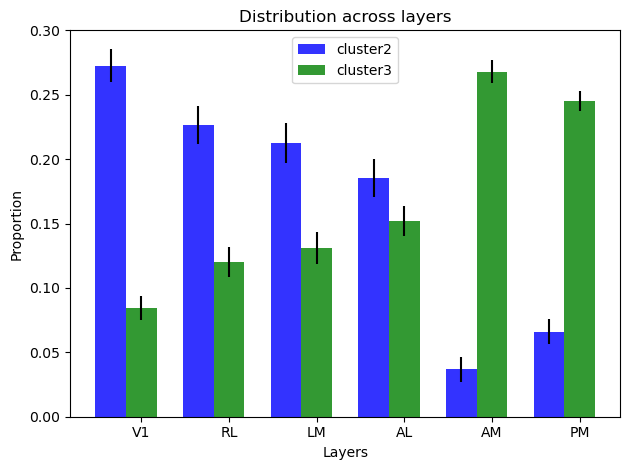

In [23]:
plt.style.use('default')
# data to plot
n_groups = 6
means_frank = layers[:,0,:].mean(0)
means_guido = layers[:,1,:].mean(0)
 
# create plot
fig, ax = plt.subplots()
index = np.arange(n_groups)
bar_width = 0.35
opacity = 0.8
 
rects1 = plt.bar(index, means_frank, bar_width,
        alpha=opacity,
        color='b',
        label='cluster2',
        yerr=layers[:,0,:].std(0))

rects2 = plt.bar(index + bar_width, means_guido, bar_width,
alpha=opacity,
color='g',
label='cluster3',
yerr=layers[:,1,:].std(0))
 
plt.xlabel('Layers')
plt.ylabel('Proportion')
plt.title('Distribution across layers')
plt.xticks(index + bar_width, ('V1','RL', 'LM', 'AL', 'AM', 'PM'))
plt.legend()
 
plt.tight_layout()
plt.ylim([0,0.3])


In [25]:
means_frank/0.27263308

array([0.99999999, 0.83103391, 0.77914183, 0.68067068, 0.13477371,
       0.24231335])

In [26]:
means_guido/0.27263308

array([0.30895499, 0.44011444, 0.4804511 , 0.55704417, 0.98271329,
       0.89865548])

# correlate with anatomical hierarchy

In [27]:
HS = [-0.50149, -0.13929, -0.12294, -0.00431, 0.11828, 0.29330] # CC-CT-TC global HS from Harris


In [28]:
means_frank = layers[:,1,:].mean(0)

In [29]:
layers.shape

(100, 2, 6)

In [30]:
# define color
colors = [[217,141,194],
          [129,116,177],
          [78,115,174],
          [101,178,201],
          [88,167,106],
          [202,183,120],
          [219,132,87],
          [194,79,84]]

def scale_colors(color):
    return [col/255. for col in color]

hierarchy_colors = [scale_colors(col) for col in colors]

color_bank = {
        'V1' : hierarchy_colors[1],
        'LM' : hierarchy_colors[2],
        'AL' : hierarchy_colors[5],
        'RL' : hierarchy_colors[3],
        'PM' : hierarchy_colors[6],
        'AM' : hierarchy_colors[7],


        'DG' : '#A4A4A4',
        'CA3' : '#6D6D6D',
        'CA1' : '#5B5B5B',
        'CA2' : '#5B5B5B',
        'CA' : '#7ED04B',
        'POST' : '#A4A4A4',
        'SUB' : '#A4A4A4',
        'HPC' : '#A4A4A4',

        'LGd' : hierarchy_colors[0],
        'LP' : hierarchy_colors[4]
        }

$r_P$ = 0.88; $P_P$ = 0.020275
$r_S$ = 0.94; $P_S$ = 0.004805


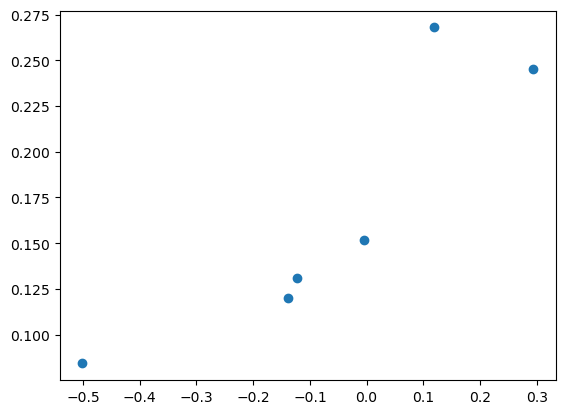

In [31]:
from scipy.stats import linregress, pearsonr, spearmanr

means_frank = layers[:,1,:].mean(0)

std = layers[:,1,:].std(0)
plt.scatter(HS, means_frank )
r_s,p_s = spearmanr(HS, means_frank)
r_p,p_p = pearsonr(HS, means_frank)
print('$r_P$ = ' + str(np.around(pow(r_p,1),2)) + '; $P_P$ = ' + str(np.around(p_p,6)) + '\n' + \
            '$r_S$ = ' + str(np.around(pow(r_s,1),2)) + '; $P_S$ = ' + str(np.around(p_s,6)))


'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches

R-squared: 0.776813


Text(0.5, 1.0, '$r_P$ = 0.88; $P_P$ = 0.020275\n$r_S$ = 0.94; $P_S$ = 0.004805')

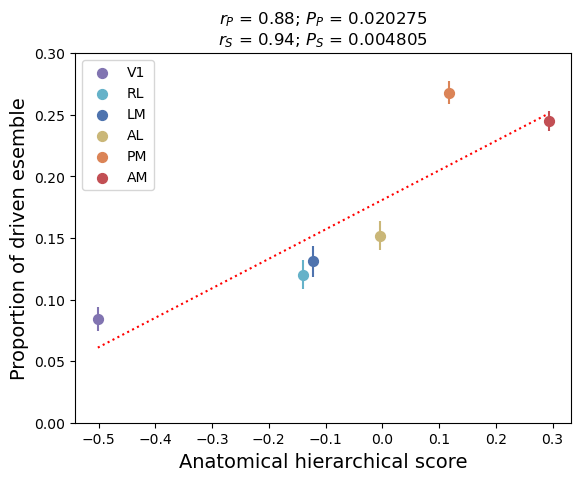

In [32]:
u = ['V1',  'RL', 'LM', 'AL',  'PM','AM',]

for i, probe in enumerate(u):   
    plt.scatter(HS[i], means_frank[i], c=color_bank[probe], s=50, label=probe)
    plt.errorbar(HS[i], means_frank[i], std[i], fmt='o', c=color_bank[probe])
plt.legend()
plt.ylim([0,0.3])
plt.xlabel('Anatomical hierarchical score', fontsize=14)
plt.ylabel('Proportion of driven esemble', fontsize=14)

res = linregress(HS, means_frank)
print(f"R-squared: {res.rvalue**2:.6f}")
plt.plot(HS, res.intercept + res.slope*np.array(HS), ':r', label='fitted line')


plt.title('$r_P$ = ' + str(np.around(pow(r_p,1),2)) + '; $P_P$ = ' + str(np.around(p_p,6)) + '\n' + \
            '$r_S$ = ' + str(np.around(pow(r_s,1),2)) + '; $P_S$ = ' + str(np.around(p_s,6)))



In [ ]:
# test distribution in individual mouse after sample matching

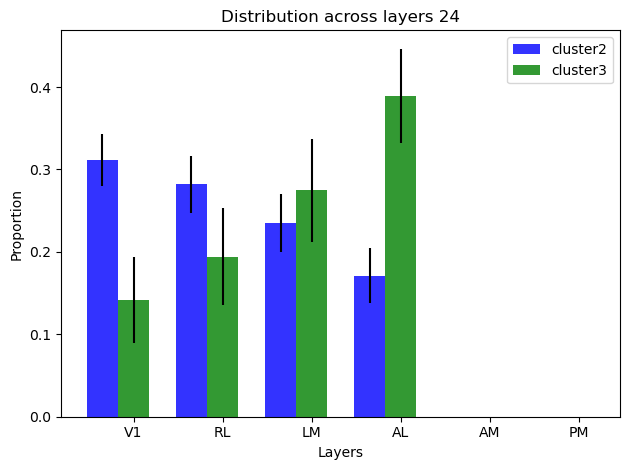

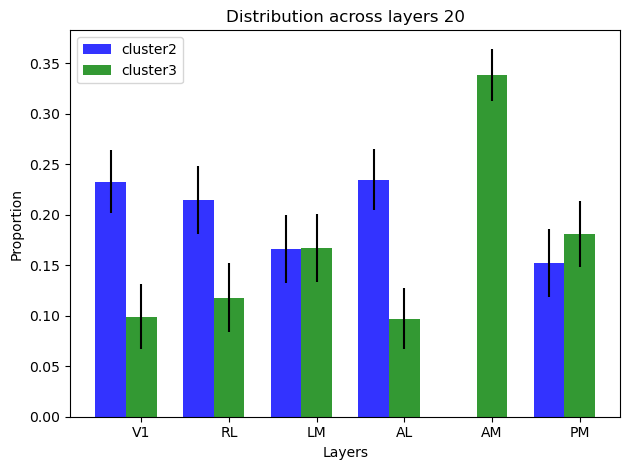

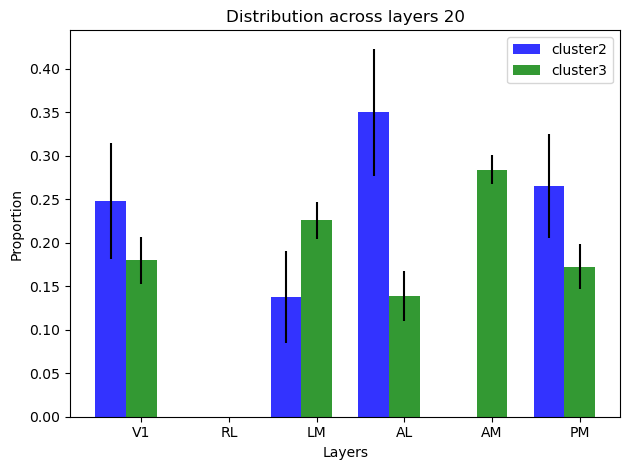

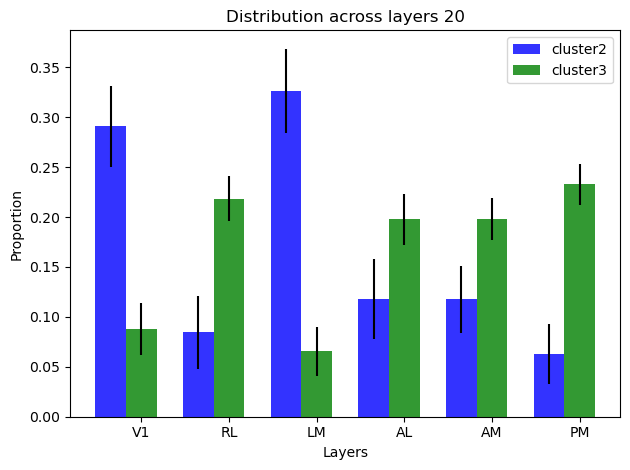

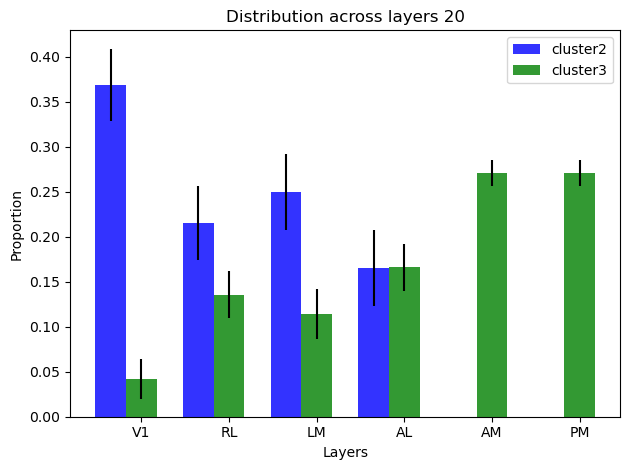

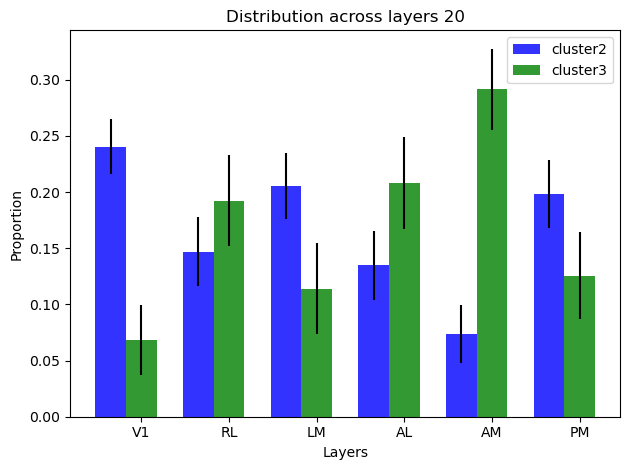

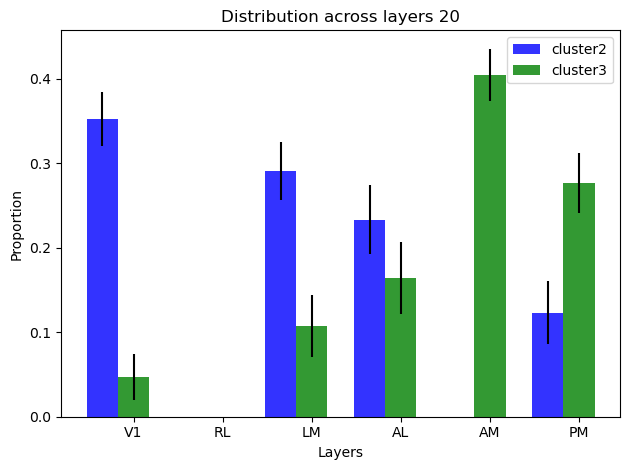

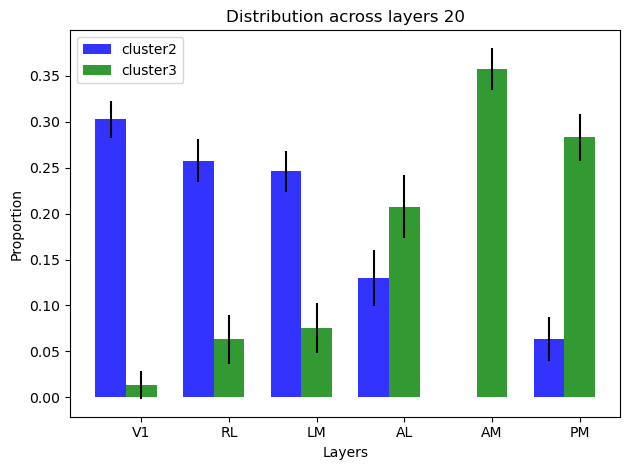

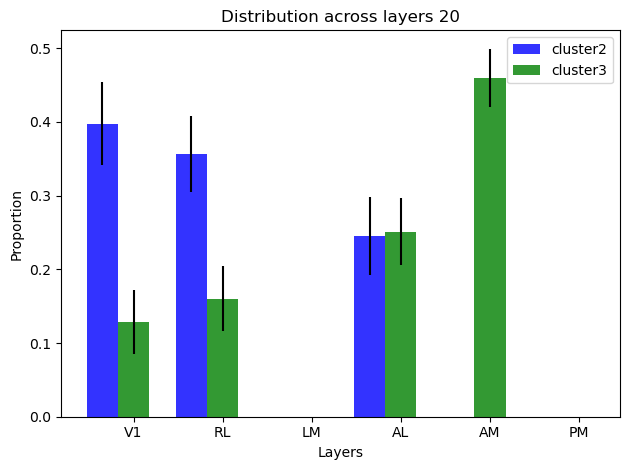

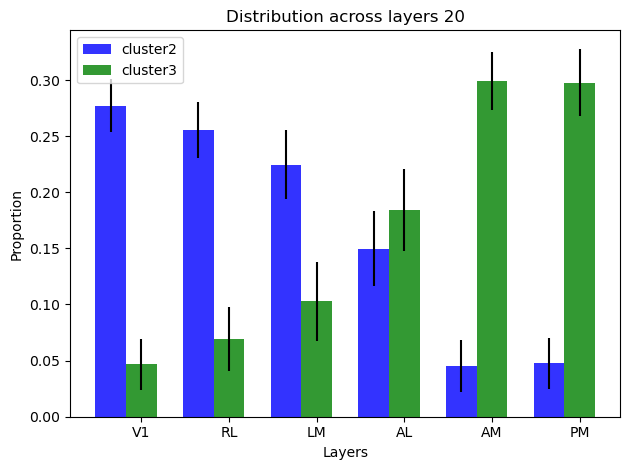

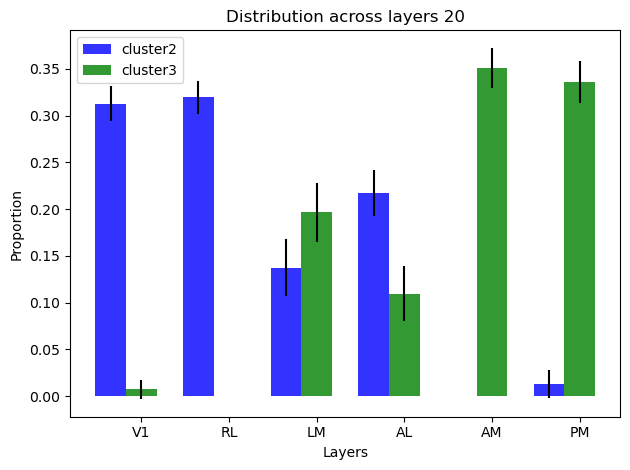

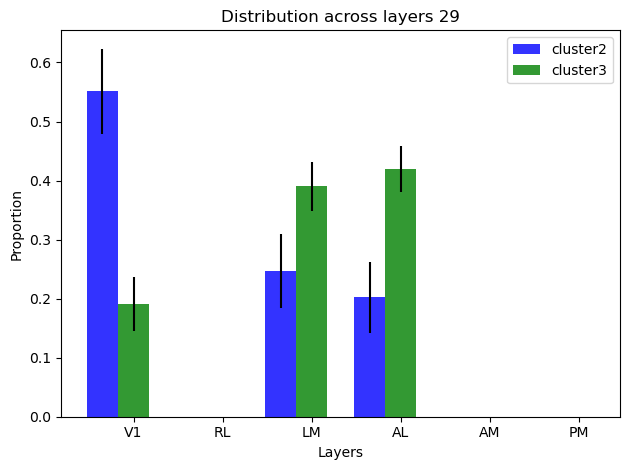

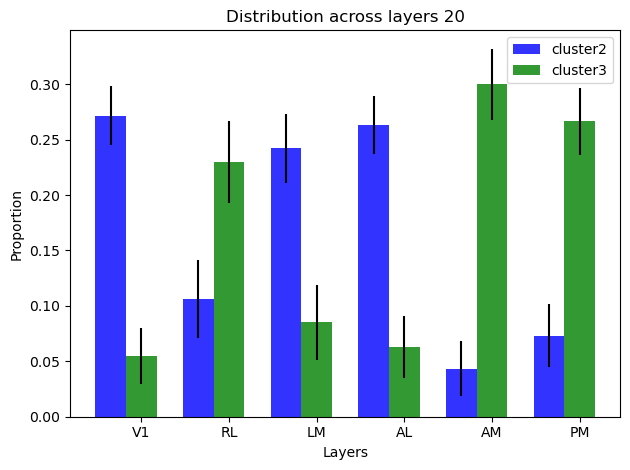

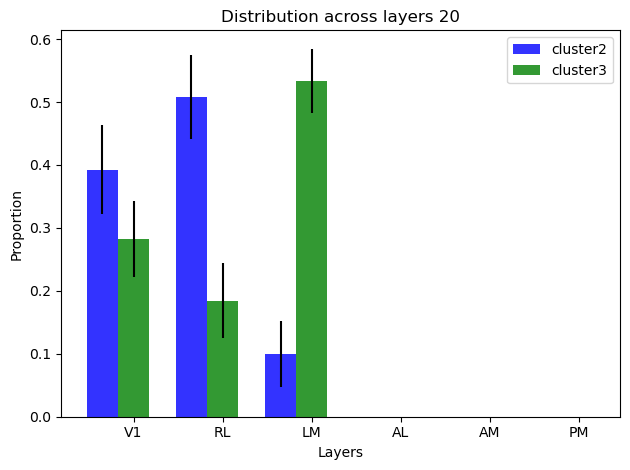

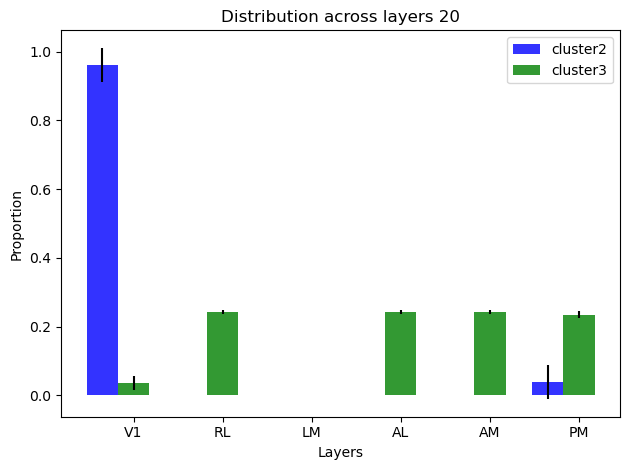

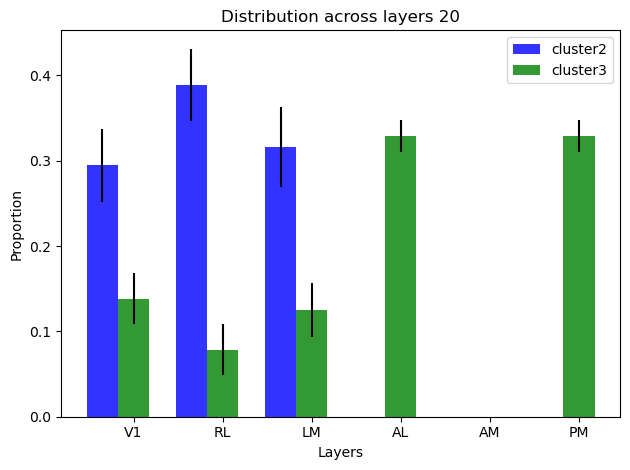

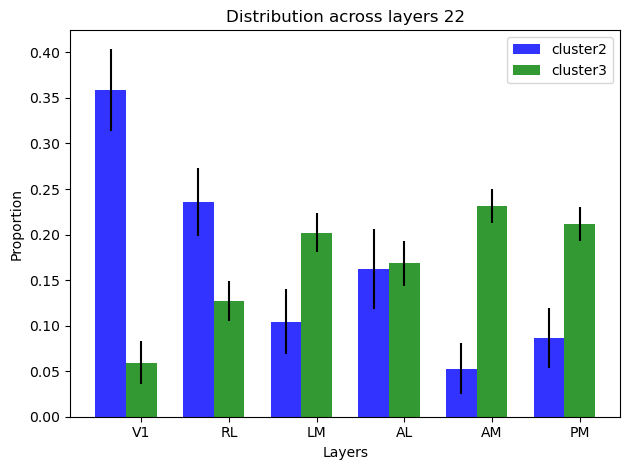

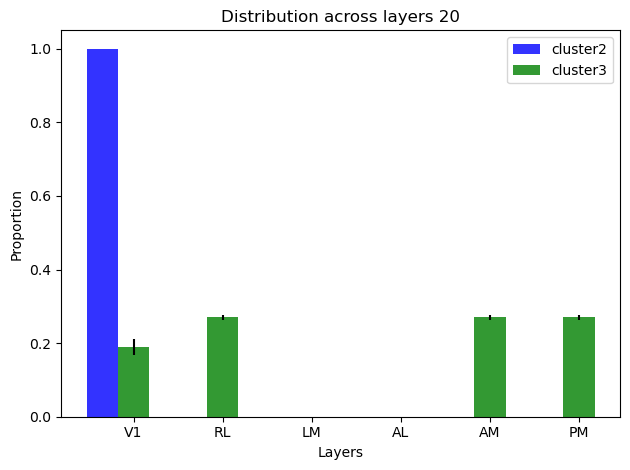

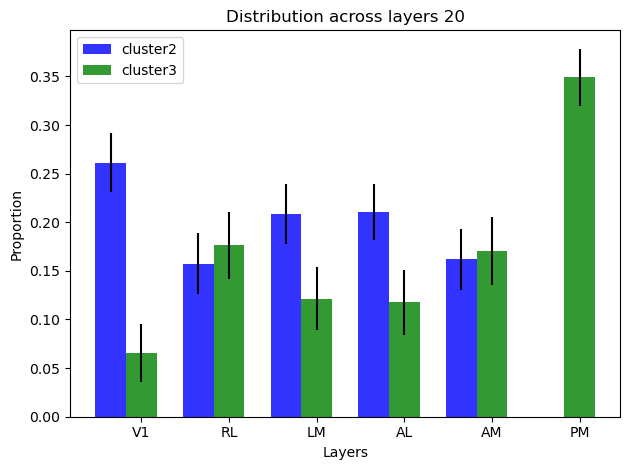

In [113]:
verbose = True

# grating and spon
mouse_IDs = ['306046','388523', '389262',  '408153','410344', '415149', '412809', '412804',
             '416856', '419114',  '419117', '419118', '419119', '424445',
             '415148', '416356','416861','419112','419116']

# movie
#mouse_IDs = ['388523', '389262',  '408153','410344', '415149', '412809', '412804',
#             '416856', '419114',  '419117', '419118', '419119', '424445',
#             '415148', '416356','416861','419112','419116']

driver=[]
driven=[]

for idx, mouse_ID in enumerate(mouse_IDs):
    df = pd.read_csv('~/data/CM/mouse'+mouse_ID+'_meta_cluster_RF.csv')
    
    DF = df
    
    # need to match number of each condition
    np.random.seed(1)
    replace = True  # with replacement
    fn = lambda obj: obj.loc[np.random.choice(obj.index, size, replace),:]

    df_tmp=DF[DF.cluster!=1]

    tmp = df_tmp.area.unique()
    n=[]
    for t in tmp:
        n.append(len(df_tmp[df_tmp.area==t]))
    n_tmp = np.sort(n)
    size=n_tmp[0]
    
    # to avoid missing target; if size is too small, use the second smallest number
    if size<20:
        size=20
    ratio = size/len(df_tmp)

    u = ['V1',  'RL', 'LM', 'AL',  'PM','AM',]
    layers = []
    for i in np.arange(100):
        np.random.seed(i)
        df_subset = df_tmp.groupby('area', as_index=False).apply(fn)
        ttmp=[]
        for cluster_id in [2,3]:
            df_ttmp=df_subset[df_subset['cluster']==cluster_id]
            tmp=[]
            for idx_u in u:
                if len(df_ttmp)!=0:
                    tmp.append(len(df_ttmp[df_ttmp['area']==idx_u])/float(len(df_ttmp)))
                else:
                    tmp.append(np.nan)
            ttmp.append(tmp)
        layers.append(ttmp)
    layers = np.array(layers)
    
    plt.style.use('default')
    # data to plot
    n_groups = 6
    means_frank = layers[:,0,:].mean(0)
    means_guido = layers[:,1,:].mean(0)

    # create plot
    fig, ax = plt.subplots()
    index = np.arange(n_groups)
    bar_width = 0.35
    opacity = 0.8

    rects1 = plt.bar(index, means_frank, bar_width,
            alpha=opacity,
            color='b',
            label='cluster2',
            yerr=layers[:,0,:].std(0))

    rects2 = plt.bar(index + bar_width, means_guido, bar_width,
    alpha=opacity,
    color='g',
    label='cluster3',
    yerr=layers[:,1,:].std(0))

    plt.xlabel('Layers')
    plt.ylabel('Proportion')
    plt.title('Distribution across layers '+str(size))
    plt.xticks(index + bar_width, ('V1','RL', 'LM', 'AL', 'AM', 'PM'))
    plt.legend()

    plt.tight_layout()
    #plt.ylim([0,0.3])
    
    driver.append(means_frank)
    driven.append(means_guido)

    #plt.savefig('/Users

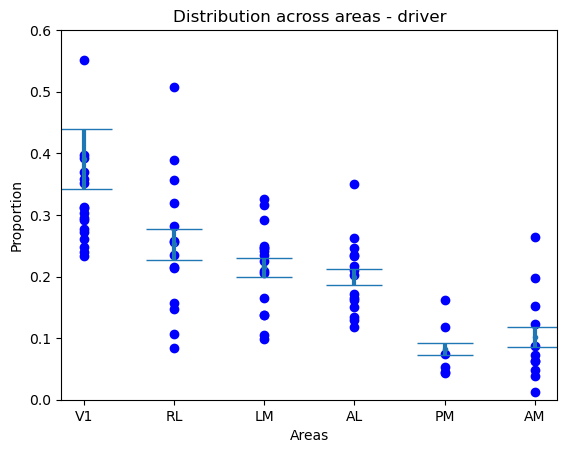

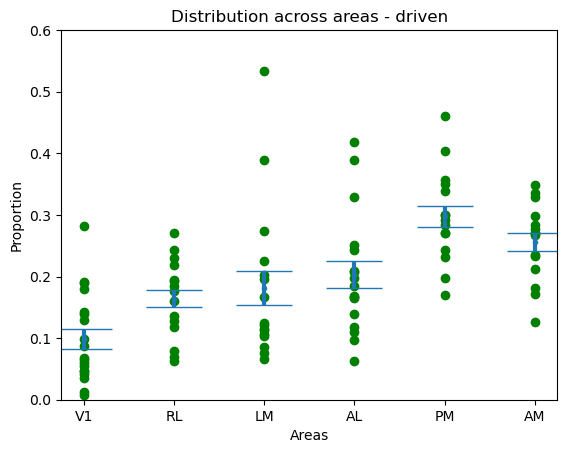

In [124]:
plt.figure()
driver = np.array(driver)
driver[driver==0]=np.nan
for i in range(19):
    plt.scatter(u,driver[i], c='blue')
    #plt.scatter(u+1,driven[i], c='green')

plt.errorbar(u,np.nanmean(driver, axis=0), np.nanstd(driver, axis=0)/np.sqrt(19),fmt='.',elinewidth=3,capsize=20)
plt.ylim([0,0.6])

plt.xlabel('Areas')
plt.ylabel('Proportion')
plt.title('Distribution across areas - driver')


plt.figure()
driven = np.array(driven)
driven[driven==0]=np.nan
for i in range(19):
    plt.scatter(u,driven[i], c='green')
    #plt.scatter(u+1,driven[i], c='green')

plt.errorbar(u,np.nanmean(driven, axis=0), np.nanstd(driven, axis=0)/np.sqrt(19),fmt='.',elinewidth=3,capsize=20)
plt.ylim([0,0.6])

plt.xlabel('Areas')
plt.ylabel('Proportion')
plt.title('Distribution across areas - driven')


<Figure size 300x300 with 0 Axes>

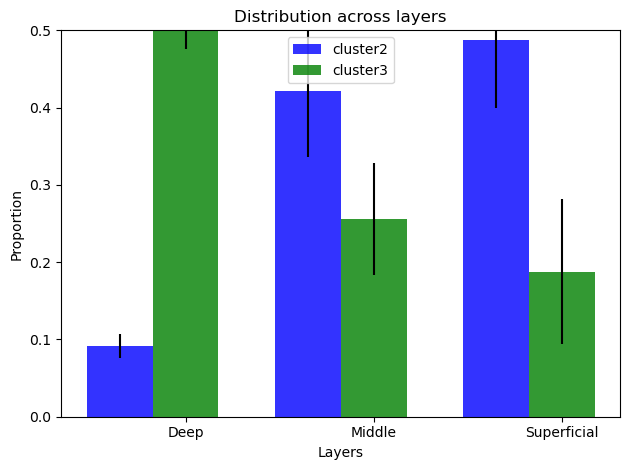

<Figure size 300x300 with 0 Axes>

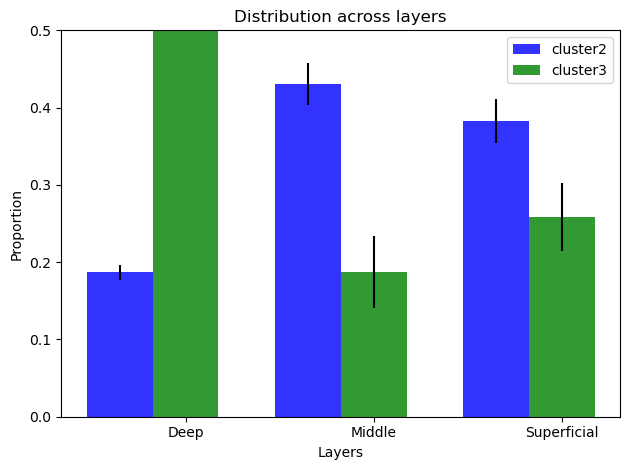

<Figure size 300x300 with 0 Axes>

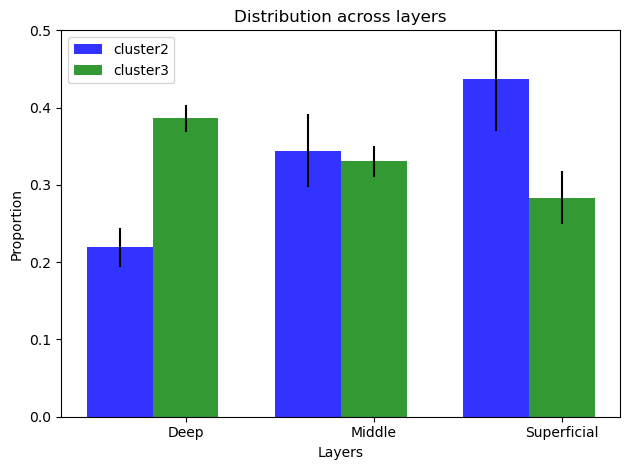

<Figure size 300x300 with 0 Axes>

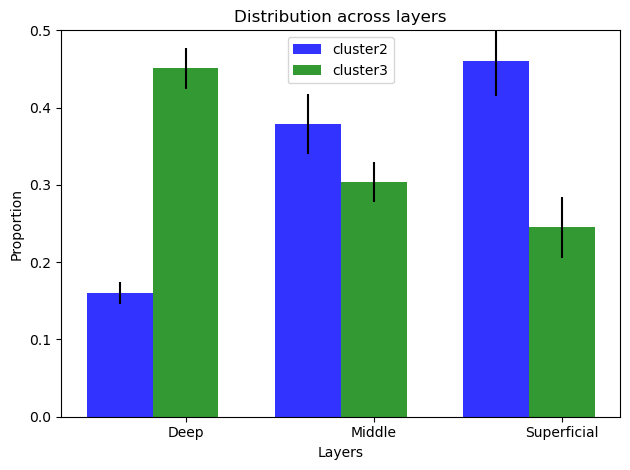

<Figure size 300x300 with 0 Axes>

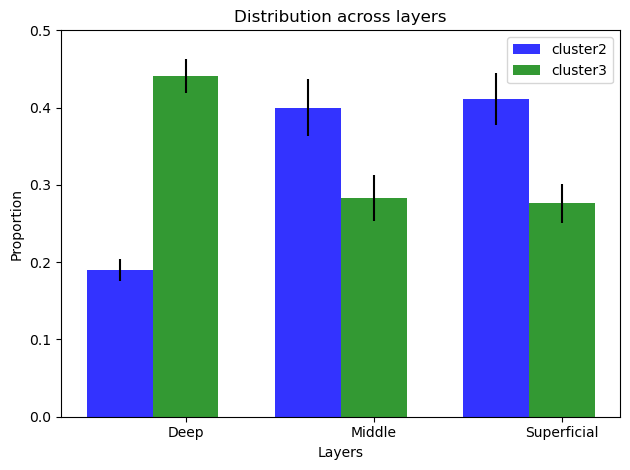

<Figure size 300x300 with 0 Axes>

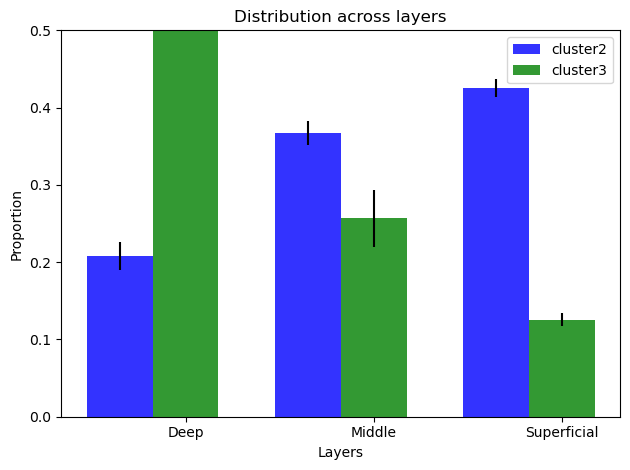

<Figure size 300x300 with 0 Axes>

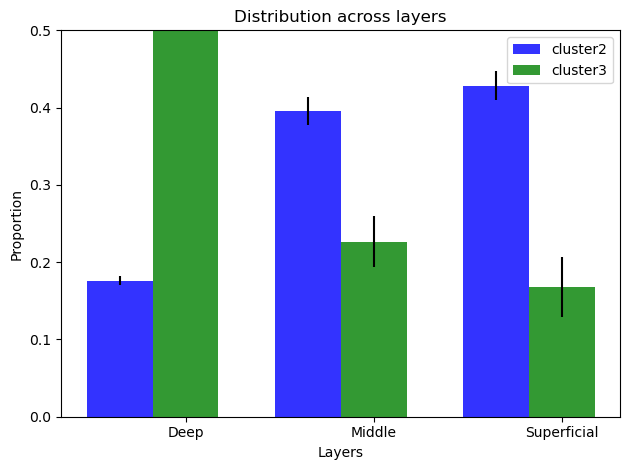

<Figure size 300x300 with 0 Axes>

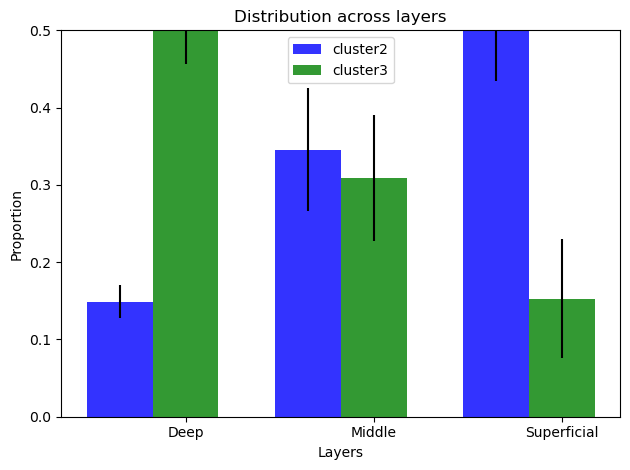

<Figure size 300x300 with 0 Axes>

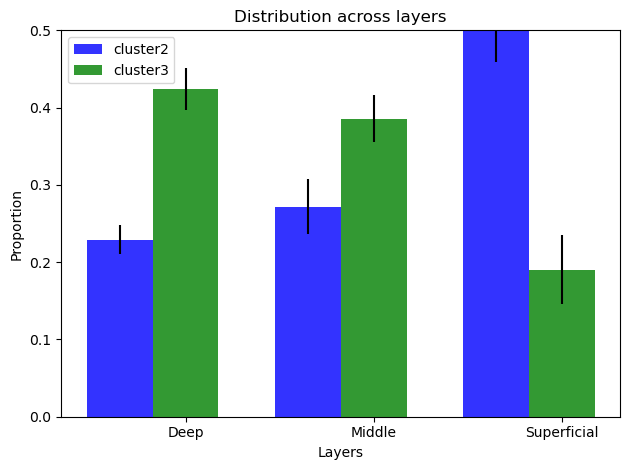

<Figure size 300x300 with 0 Axes>

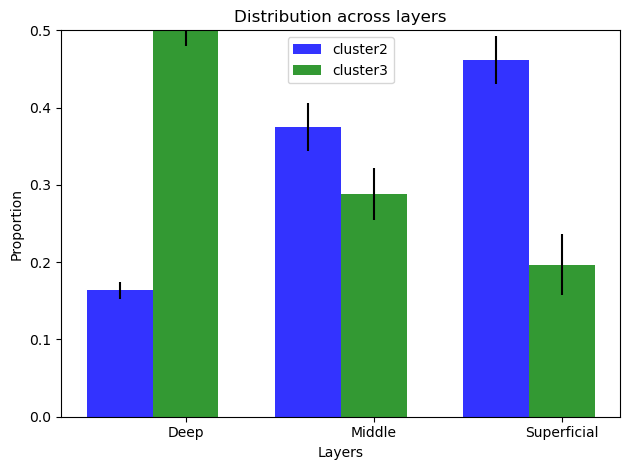

<Figure size 300x300 with 0 Axes>

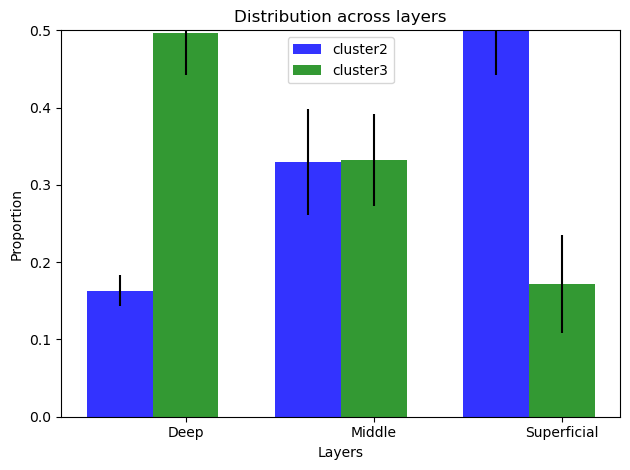

<Figure size 300x300 with 0 Axes>

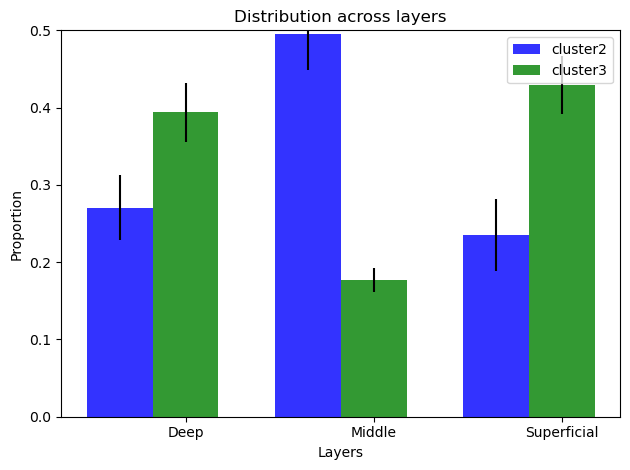

<Figure size 300x300 with 0 Axes>

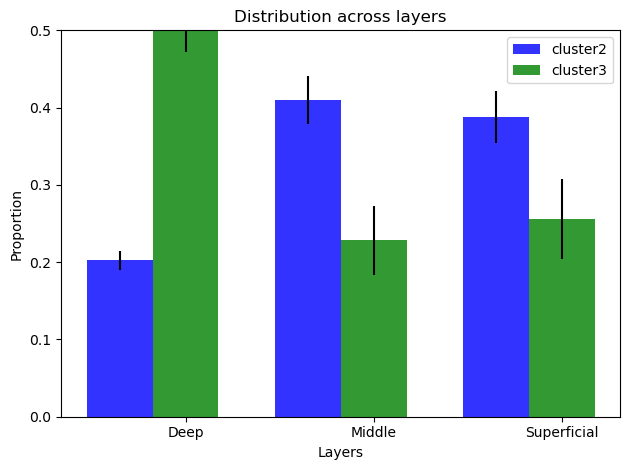

<Figure size 300x300 with 0 Axes>

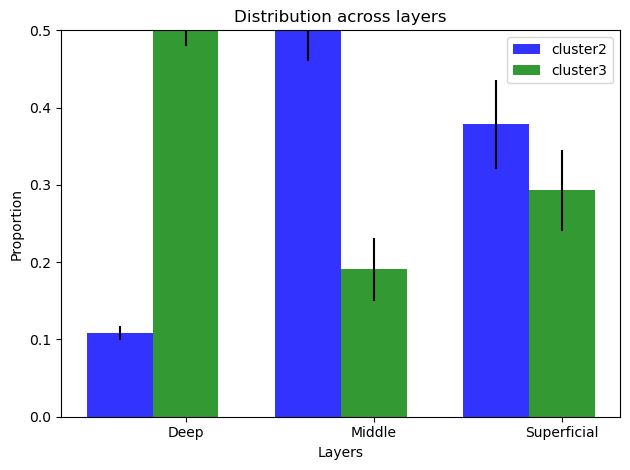

<Figure size 300x300 with 0 Axes>

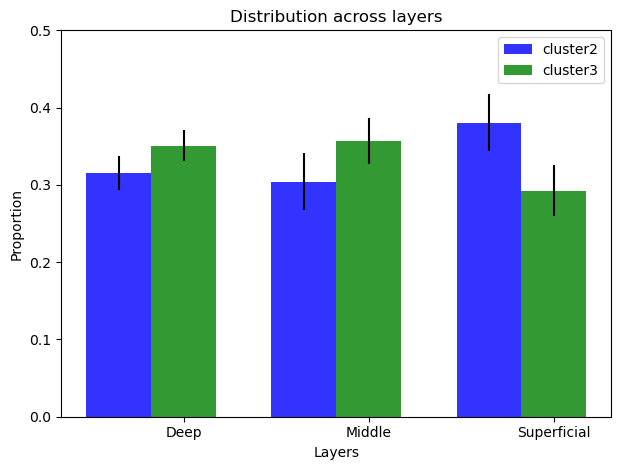

<Figure size 300x300 with 0 Axes>

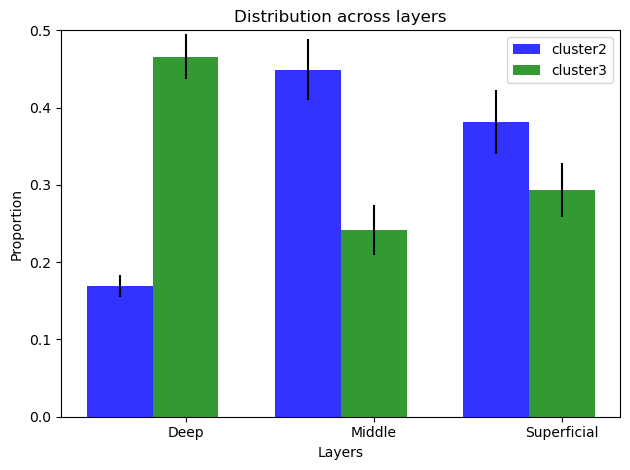

<Figure size 300x300 with 0 Axes>

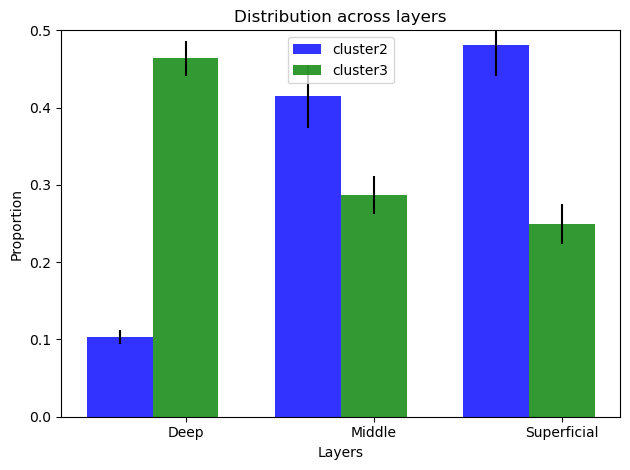

<Figure size 300x300 with 0 Axes>

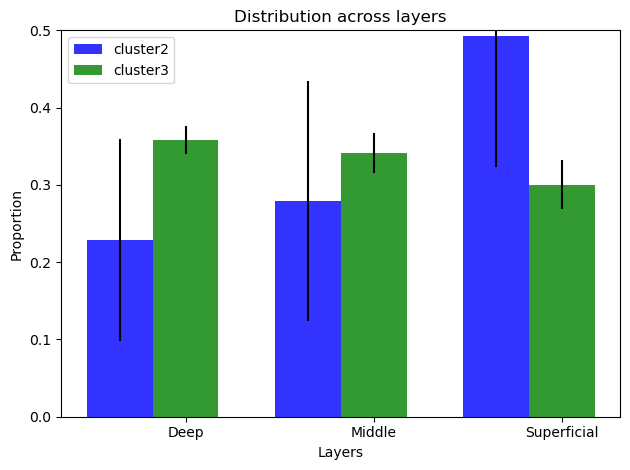

<Figure size 300x300 with 0 Axes>

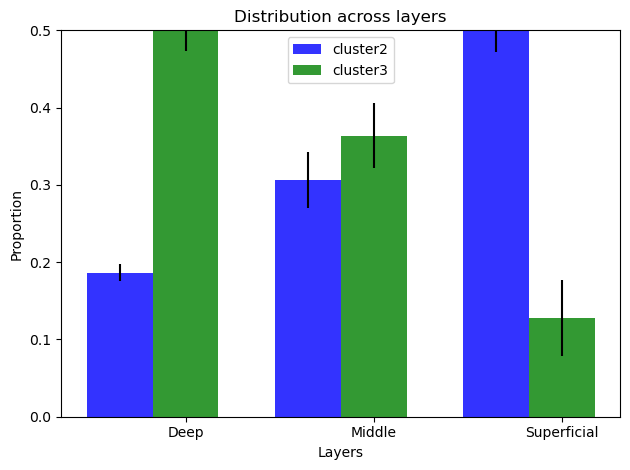

In [18]:
verbose = True

# grating and spon
mouse_IDs = ['306046','388523', '389262',  '408153','410344', '415149', '412809', '412804',
             '416856', '419114',  '419117', '419118', '419119', '424445',
             '415148', '416356','416861','419112','419116']

# movie
#mouse_IDs = ['388523', '389262',  '408153','410344', '415149', '412809', '412804',
#             '416856', '419114',  '419117', '419118', '419119', '424445',
#             '415148', '416356','416861','419112','419116']

driver=[]
driven=[]

for idx, mouse_ID in enumerate(mouse_IDs):
    df = pd.read_csv('~/data/CM/mouse'+mouse_ID+'_meta_cluster_RF.csv')
    
    DF = df
    
    # subsample to match number of units in each layer or area
    np.random.seed(1)
    replace = False  # with replacement

    df_tmp=DF[DF.cluster!=1]

    tmp = df_tmp.depth_range_3layer.unique()
    n=[]
    for t in tmp:
        n.append(len(df_tmp[df_tmp.depth_range_3layer==t]))
    size=min(n)

    ratio = size/len(df_tmp)
    #random subsample

    fn = lambda obj: obj.loc[np.random.choice(obj.index, size, replace),:]
    df_subset = df_tmp.groupby('depth_range_3layer', as_index=False).apply(fn)


    u = np.unique(DF['depth_range_3layer'].values)
    layers = []
    for i in range(100):
        np.random.seed(i)
        df_subset = df_tmp.groupby('depth_range_3layer', as_index=False).apply(fn)
        ttmp=[]
        for cluster_id in [2,3]:
            df_ttmp=df_subset[df_subset['cluster']==cluster_id]
            tmp=[]
            for idx_u in u:
                tmp.append(len(df_ttmp[df_ttmp['depth_range_3layer']==idx_u])/float(len(df_ttmp)))
            ttmp.append(tmp)
        layers.append(ttmp)
    layers = np.array(layers)
    
    plt.style.use('default')
    # data to plot
    n_groups = 3
    means_frank = layers[:,0,:].mean(0)
    means_guido = layers[:,1,:].mean(0)

    # create plot
    plt.figure(figsize=(3,3))
    fig, ax = plt.subplots()
    index = np.arange(n_groups)
    bar_width = 0.35
    opacity = 0.8

    rects1 = plt.bar(index, means_frank, bar_width,
            alpha=opacity,
            color='b',
            label='cluster2',
            yerr=layers[:,0,:].std(0))

    rects2 = plt.bar(index + bar_width, means_guido, bar_width,
    alpha=opacity,
    color='g',
    label='cluster3',
    yerr=layers[:,1,:].std(0))

    plt.xlabel('Layers')
    plt.ylabel('Proportion')
    plt.title('Distribution across layers')
    plt.xticks(index + bar_width, ('Deep', 'Middle', 'Superficial'))
    plt.legend()

    plt.tight_layout()
    plt.ylim([0,0.5])
    
    driver.append(means_frank)
    driven.append(means_guido)

    #plt.savefig('/Users

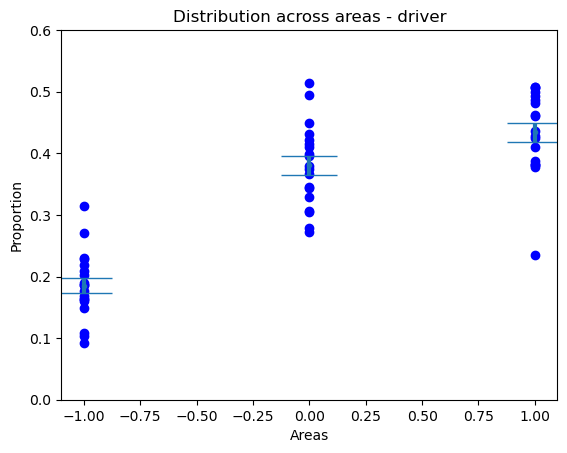

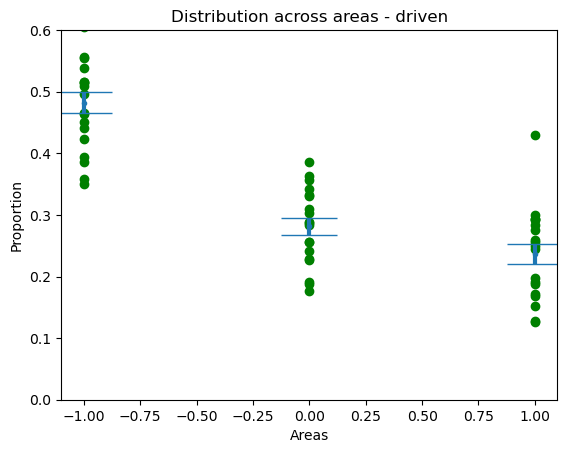

In [20]:
plt.figure()
driver = np.array(driver)
driver[driver==0]=np.nan
for i in range(19):
    plt.scatter(u,driver[i], c='blue')
    #plt.scatter(u+1,driven[i], c='green')

plt.errorbar(u,np.nanmean(driver, axis=0), np.nanstd(driver, axis=0)/np.sqrt(19),fmt='.',elinewidth=3,capsize=20)
plt.ylim([0,0.6])

plt.xlabel('Areas')
plt.ylabel('Proportion')
plt.title('Distribution across areas - driver')


plt.figure()
driven = np.array(driven)
driven[driven==0]=np.nan
for i in range(19):
    plt.scatter(u,driven[i], c='green')
    #plt.scatter(u+1,driven[i], c='green')

plt.errorbar(u,np.nanmean(driven, axis=0), np.nanstd(driven, axis=0)/np.sqrt(19),fmt='.',elinewidth=3,capsize=20)
plt.ylim([0,0.6])

plt.xlabel('Areas')
plt.ylabel('Proportion')
plt.title('Distribution across areas - driven')
